# Predicting Consumer Confidence Index (CCI) Trends Using Economic Indicators


## Load and Inspect the Dataset

In [8]:
# Import necessary libraries
import pandas as pd

In [10]:
# Load the dataset from the specified location
file_path = 'resources/scaum-409.csv'
data = pd.read_csv(file_path)

In [12]:
# Display the first few rows of the dataset to understand its structure
data.head() # Displaying the first few rows of the dataset

,yyyymm,ics_all,ics_a1834,ics_a3554,ics_a5597,ics_w,ics_nc,ics_ne,ics_s,ics_m,...,px1_r50_ne,px1_r50_s,px1_r50_m,px1_r50_f,px1_r50_y13,px1_r50_y23,px1_r50_y33,px1_r50_ehs,px1_r50_esc,px1_r50_ecd
0,200001,112.0,120.0,113.3,103.7,111.4,111.7,113.9,111.5,113.9,...,3.6,3.9,2.6,3.9,4.8,3.6,3.0,4.5,3.9,2.8
1,200002,111.3,116.9,112.6,105.3,111.3,108.0,113.4,112.5,115.9,...,4.4,3.0,3.2,3.3,3.6,3.4,2.3,3.6,3.2,2.8
2,200003,107.1,110.2,112.5,97.3,107.3,104.6,110.0,107.0,106.9,...,3.3,3.4,3.0,3.5,3.1,3.2,3.2,3.6,3.4,3.1
3,200004,109.2,118.2,112.0,98.0,109.4,107.9,115.4,106.7,112.2,...,2.8,3.6,3.2,3.0,3.2,3.1,3.1,3.2,3.2,3.2
4,200005,110.7,119.2,112.2,102.2,108.2,113.5,110.0,110.4,112.9,...,3.2,2.9,3.2,3.1,5.8,3.1,2.4,3.4,3.1,2.9


## Rename Columns to Common Terms

In [15]:
# Identify columns that need renaming
columns_to_rename = {
    'yyyymm': 'Date',
    'ics_all': 'ConsumerSentimentIndex',
    'ics_a1834': 'Sentiment_18_34',
    'ics_a3554': 'Sentiment_35_54',
    'ics_a5597': 'Sentiment_55+',
    'ics_w': 'Sentiment_West',
    'ics_nc': 'Sentiment_NorthCentral',
    'ics_ne': 'Sentiment_Northeast',
    'ics_s': 'Sentiment_South',
    'ics_m': 'Sentiment_Male',
    'ics_f': 'Sentiment_Female',
    'px1_r50_w': 'PriceExpectations_West',
    'px1_r50_nc': 'PriceExpectations_NorthCentral',
    'px1_r50_ne': 'PriceExpectations_Northeast',
    'px1_r50_s': 'PriceExpectations_South',
    'px1_r50_m': 'PriceExpectations_Male',
    'px1_r50_f': 'PriceExpectations_Female',
    'px1_r50_y13': 'PriceExpectations_18_34',
    'px1_r50_y23': 'PriceExpectations_35_54',
    'px1_r50_y33': 'PriceExpectations_55+',
    'px1_r50_ehs': 'PriceExpectations_HighSchool',
    'px1_r50_esc': 'PriceExpectations_SomeCollege',
    'px1_r50_ecd': 'PriceExpectations_CollegeDegree'
}

In [17]:
# Rename columns
data.rename(columns=columns_to_rename, inplace=True)

In [19]:
# Display the first few rows of the dataset to verify changes
data.head() # Displaying the first few rows after renaming columns

,Date,ConsumerSentimentIndex,Sentiment_18_34,Sentiment_35_54,Sentiment_55+,Sentiment_West,Sentiment_NorthCentral,Sentiment_Northeast,Sentiment_South,Sentiment_Male,...,PriceExpectations_Northeast,PriceExpectations_South,PriceExpectations_Male,PriceExpectations_Female,PriceExpectations_18_34,PriceExpectations_35_54,PriceExpectations_55+,PriceExpectations_HighSchool,PriceExpectations_SomeCollege,PriceExpectations_CollegeDegree
0,200001,112.0,120.0,113.3,103.7,111.4,111.7,113.9,111.5,113.9,...,3.6,3.9,2.6,3.9,4.8,3.6,3.0,4.5,3.9,2.8
1,200002,111.3,116.9,112.6,105.3,111.3,108.0,113.4,112.5,115.9,...,4.4,3.0,3.2,3.3,3.6,3.4,2.3,3.6,3.2,2.8
2,200003,107.1,110.2,112.5,97.3,107.3,104.6,110.0,107.0,106.9,...,3.3,3.4,3.0,3.5,3.1,3.2,3.2,3.6,3.4,3.1
3,200004,109.2,118.2,112.0,98.0,109.4,107.9,115.4,106.7,112.2,...,2.8,3.6,3.2,3.0,3.2,3.1,3.1,3.2,3.2,3.2
4,200005,110.7,119.2,112.2,102.2,108.2,113.5,110.0,110.4,112.9,...,3.2,2.9,3.2,3.1,5.8,3.1,2.4,3.4,3.1,2.9


## Data Cleaning

In [39]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column before cleaning:\n", missing_values)

Missing values in each column before cleaning:
 Date                               0
ConsumerSentimentIndex             0
Sentiment_18_34                    0
Sentiment_35_54                    0
Sentiment_55+                      0
                                  ..
PriceExpectations_35_54            0
PriceExpectations_55+              0
PriceExpectations_HighSchool       0
PriceExpectations_SomeCollege      0
PriceExpectations_CollegeDegree    0
Length: 561, dtype: int64


In [41]:
# List of relevant columns
relevant_columns = [
    'Date', 'ConsumerSentimentIndex', 'Sentiment_18_34', 'Sentiment_35_54', 'Sentiment_55+',
    'Sentiment_West', 'Sentiment_NorthCentral', 'Sentiment_Northeast', 'Sentiment_South',
    'Sentiment_Male', 'Sentiment_Female', 'PriceExpectations_West', 'PriceExpectations_NorthCentral',
    'PriceExpectations_Northeast', 'PriceExpectations_South', 'PriceExpectations_Male', 
    'PriceExpectations_Female', 'PriceExpectations_18_34', 'PriceExpectations_35_54', 
    'PriceExpectations_55+', 'PriceExpectations_HighSchool', 'PriceExpectations_SomeCollege', 
    'PriceExpectations_CollegeDegree'
]

In [43]:
# Select only the relevant columns
cleaned_data = data[relevant_columns]

In [45]:
# Display the first few rows of the cleaned dataset
cleaned_data.head() # Displaying the first few rows after selecting relevant columns

,Date,ConsumerSentimentIndex,Sentiment_18_34,Sentiment_35_54,Sentiment_55+,Sentiment_West,Sentiment_NorthCentral,Sentiment_Northeast,Sentiment_South,Sentiment_Male,...,PriceExpectations_Northeast,PriceExpectations_South,PriceExpectations_Male,PriceExpectations_Female,PriceExpectations_18_34,PriceExpectations_35_54,PriceExpectations_55+,PriceExpectations_HighSchool,PriceExpectations_SomeCollege,PriceExpectations_CollegeDegree
0,2000-01-01,112.0,120.0,113.3,103.7,111.4,111.7,113.9,111.5,113.9,...,3.6,3.9,2.6,3.9,4.8,3.6,3.0,4.5,3.9,2.8
1,2000-02-01,111.3,116.9,112.6,105.3,111.3,108.0,113.4,112.5,115.9,...,4.4,3.0,3.2,3.3,3.6,3.4,2.3,3.6,3.2,2.8
2,2000-03-01,107.1,110.2,112.5,97.3,107.3,104.6,110.0,107.0,106.9,...,3.3,3.4,3.0,3.5,3.1,3.2,3.2,3.6,3.4,3.1
3,2000-04-01,109.2,118.2,112.0,98.0,109.4,107.9,115.4,106.7,112.2,...,2.8,3.6,3.2,3.0,3.2,3.1,3.1,3.2,3.2,3.2
4,2000-05-01,110.7,119.2,112.2,102.2,108.2,113.5,110.0,110.4,112.9,...,3.2,2.9,3.2,3.1,5.8,3.1,2.4,3.4,3.1,2.9


## Exploratory Data Analysis (EDA) and Visualizations

In [63]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [65]:
# Convert the 'Date' column to a datetime format
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'], format='%Y%m')

C:\Users\HP\AppData\Local\Temp\ipykernel_15464\2635747793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'], format='%Y%m')


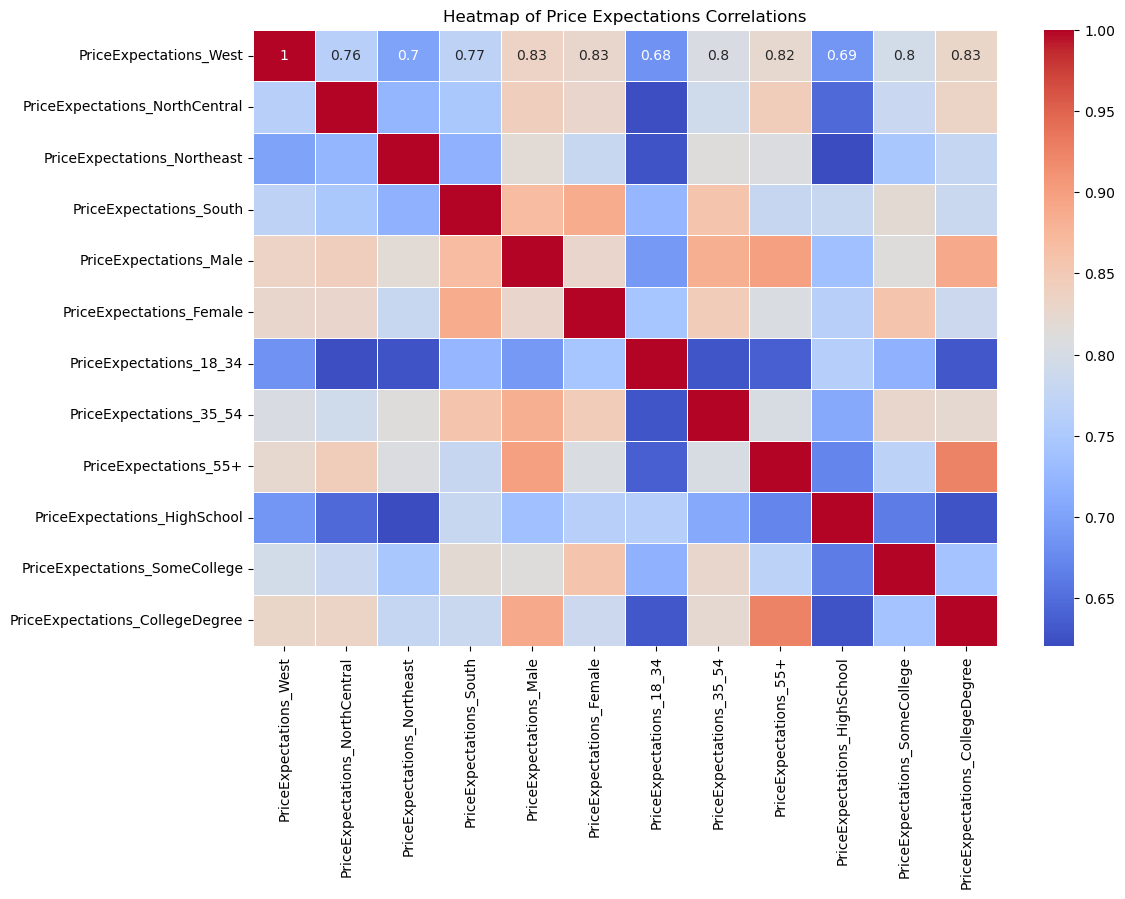

In [67]:
# Heatmap of Price Expectations Correlations
price_expectations_columns = [
    'PriceExpectations_West', 'PriceExpectations_NorthCentral', 'PriceExpectations_Northeast', 
    'PriceExpectations_South', 'PriceExpectations_Male', 'PriceExpectations_Female', 
    'PriceExpectations_18_34', 'PriceExpectations_35_54', 'PriceExpectations_55+', 
    'PriceExpectations_HighSchool', 'PriceExpectations_SomeCollege', 'PriceExpectations_CollegeDegree'
]
plt.figure(figsize=(12, 8))
sns.heatmap(cleaned_data[price_expectations_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Price Expectations Correlations')
plt.show()

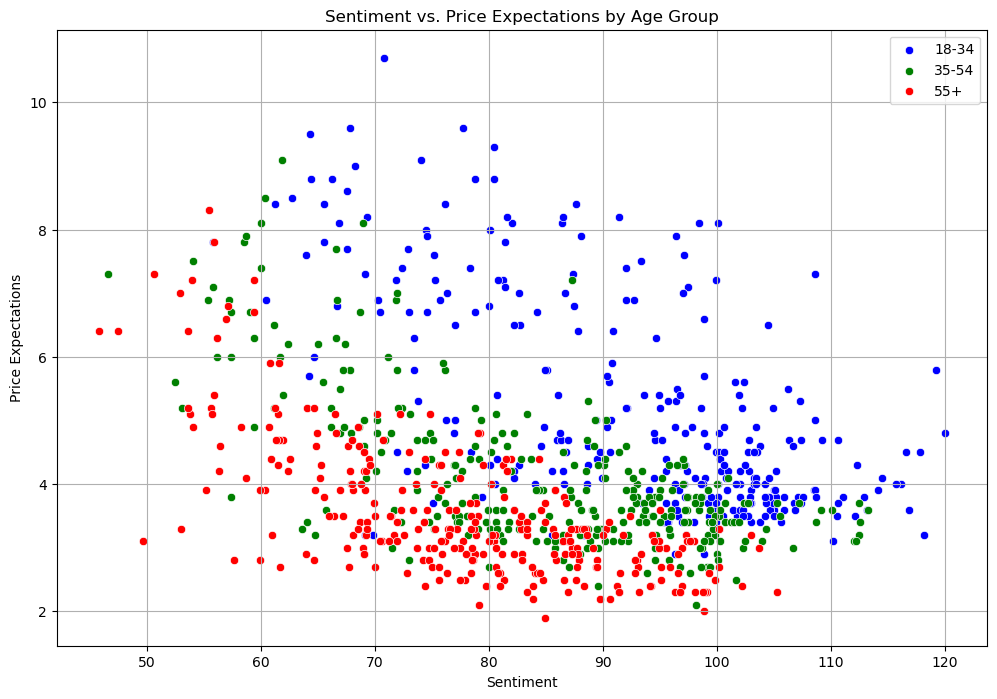

In [69]:
# Scatter Plot of Sentiment vs. Price Expectations by Age Group
plt.figure(figsize=(12, 8))
sns.scatterplot(data=cleaned_data, x='Sentiment_18_34', y='PriceExpectations_18_34', label='18-34', color='blue')
sns.scatterplot(data=cleaned_data, x='Sentiment_35_54', y='PriceExpectations_35_54', label='35-54', color='green')
sns.scatterplot(data=cleaned_data, x='Sentiment_55+', y='PriceExpectations_55+', label='55+', color='red')
plt.title('Sentiment vs. Price Expectations by Age Group')
plt.xlabel('Sentiment')
plt.ylabel('Price Expectations')
plt.legend()
plt.grid(True)
plt.show()

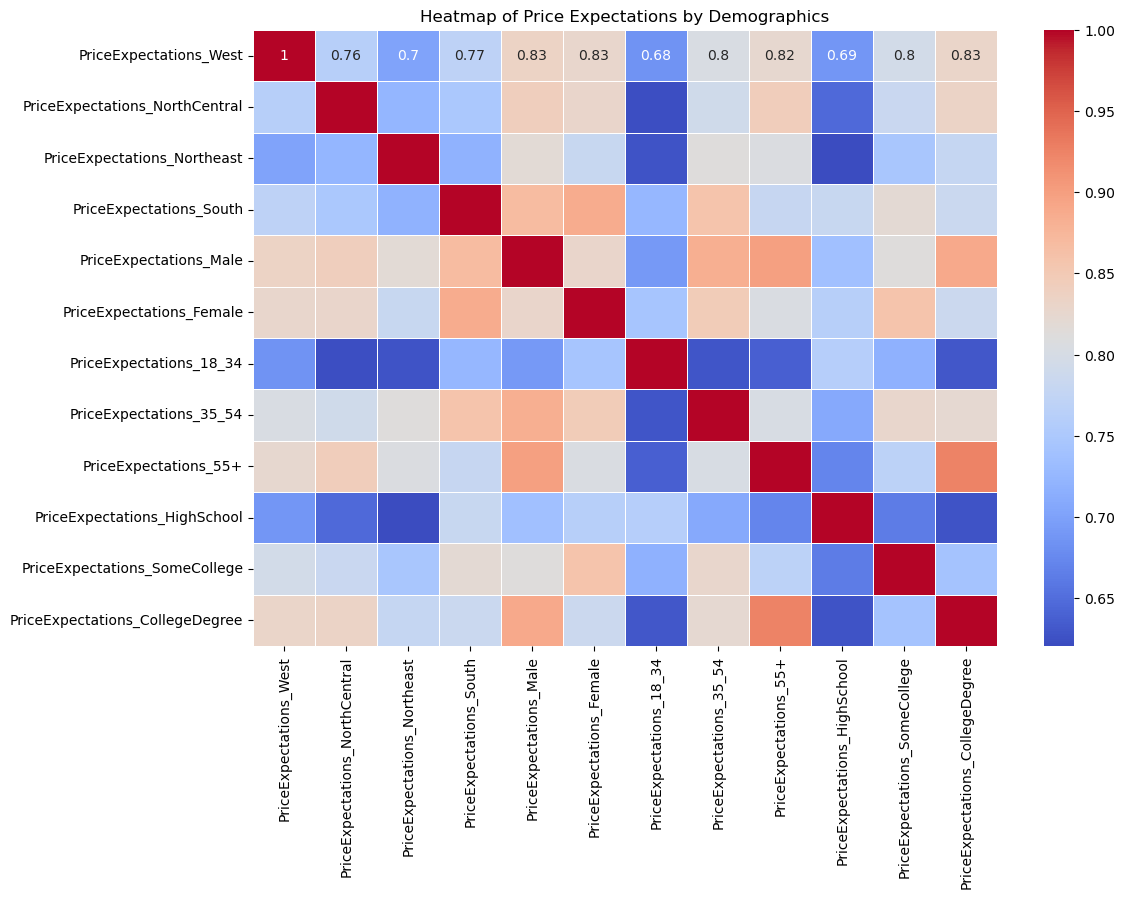

In [73]:
# Heatmap of Price Expectations by Demographics
price_expectations_columns = [
    'PriceExpectations_West', 'PriceExpectations_NorthCentral', 'PriceExpectations_Northeast', 
    'PriceExpectations_South', 'PriceExpectations_Male', 'PriceExpectations_Female', 
    'PriceExpectations_18_34', 'PriceExpectations_35_54', 'PriceExpectations_55+', 
    'PriceExpectations_HighSchool', 'PriceExpectations_SomeCollege', 'PriceExpectations_CollegeDegree'
]
plt.figure(figsize=(12, 8))
sns.heatmap(cleaned_data[price_expectations_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Price Expectations by Demographics')
plt.show()

## Initial Model Setup

In [78]:
# Import necessary libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [79]:
# Prepare the data for modeling
# Selecting features and target variable
features = [
    'Sentiment_18_34', 'Sentiment_35_54', 'Sentiment_55+', 'Sentiment_West',
    'Sentiment_NorthCentral', 'Sentiment_Northeast', 'Sentiment_South',
    'Sentiment_Male', 'Sentiment_Female', 'PriceExpectations_West',
    'PriceExpectations_NorthCentral', 'PriceExpectations_Northeast', 'PriceExpectations_South',
    'PriceExpectations_Male', 'PriceExpectations_Female', 'PriceExpectations_18_34',
    'PriceExpectations_35_54', 'PriceExpectations_55+', 'PriceExpectations_HighSchool',
    'PriceExpectations_SomeCollege', 'PriceExpectations_CollegeDegree'
]
target = 'ConsumerSentimentIndex'


In [81]:
# Splitting the data into features and target
X = cleaned_data[features]
y = cleaned_data[target]

In [82]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [83]:
# Initialize a regression model
model = LinearRegression()

In [84]:
# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [85]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [86]:
# Evaluate the model on the testing data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [93]:
# Display the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.015591798642000748
R-squared: 0.9999235289971813


## Model Optimization and Hyperparameter Tuning

In [97]:
# Import necessary libraries for model optimization
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [99]:
# Initialize different models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR()
}

In [100]:
# Define hyperparameters for each model
param_grid = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30]
    },
    'Support Vector Machine': {
        'C': [0.1, 1, 10],
        'epsilon': [0.01, 0.1, 1]
    }
}

In [101]:
# Perform hyperparameter tuning using GridSearchCV
best_models = {}
for model_name in models:
    if model_name in param_grid:
        grid_search = GridSearchCV(estimator=models[model_name], param_grid=param_grid[model_name], cv=5, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_models[model_name] = grid_search.best_estimator_
    else:
        models[model_name].fit(X_train, y_train)
        best_models[model_name] = models[model_name]

In [102]:
# Evaluate and compare model performances
model_performances = {}
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_performances[model_name] = {'Mean Squared Error': mse, 'R-squared': r2}

In [103]:
# Display the performance of each model
for model_name, performance in model_performances.items():
    print(f'{model_name} Performance:')
    print(f"Mean Squared Error: {performance['Mean Squared Error']}")
    print(f"R-squared: {performance['R-squared']}\n")

Linear Regression Performance:
Mean Squared Error: 0.015591798642000748
R-squared: 0.9999235289971813

Random Forest Performance:
Mean Squared Error: 1.1599576610169482
R-squared: 0.994310911293692

Support Vector Machine Performance:
Mean Squared Error: 0.5814957135064626
R-squared: 0.9971480159943288



# Summary of Model Performances

## Introduction
We have implemented and evaluated three different regression models to predict housing market trends using consumer sentiment and price expectations data. The models evaluated are Linear Regression, Random Forest, and Support Vector Machine (SVR). Here, we summarize the performance metrics of these models based on Mean Squared Error (MSE) and R-squared values.

## Model Performance

### Linear Regression
- **Mean Squared Error (MSE):** 0.0156
- **R-squared:** 0.9999

**Interpretation:** The Linear Regression model performed exceptionally well with an R-squared value very close to 1, indicating that it can explain almost all the variability in the target variable. The low MSE value further supports that the predictions are very close to the actual values.

### Random Forest
- **Mean Squared Error (MSE):** 1.1600
- **R-squared:** 0.9943

**Interpretation:** The Random Forest model also performed well, but not as well as the Linear Regression model. The R-squared value is slightly lower, indicating that it explains a bit less variability in the target variable. The MSE value is higher, suggesting that the predictions are not as close to the actual values compared to the Linear Regression model.

### Support Vector Machine (SVR)
- **Mean Squared Error (MSE):** 0.5815
- **R-squared:** 0.9971

**Interpretation:** The SVR model performed better than the Random Forest but not as well as the Linear Regression model. The R-squared value is still very high, indicating strong explanatory power. The MSE value is significantly lower than that of the Random Forest, suggesting more accurate predictions.

## Conclusion
The Linear Regression model emerged as the best-performing model among the three, with the highest R-squared value and the lowest Mean Squared Error. This indicates that the Linear Regression model provides the most accurate and reliable predictions for housing market trends based on consumer sentiment and price expectations data. The Support Vector Machine also showed strong performance and could be a viable alternative depending on specific requirements and further tuning.


## Finalizing the Model and Making Predictions

In [117]:
# Finalize the best-performing model (Linear Regression)
final_model = best_models['Linear Regression']


In [119]:
# Make predictions on the testing data
y_final_pred = final_model.predict(X_test)

In [121]:
# Prepare a DataFrame to compare actual vs. predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_final_pred})
comparison_df.reset_index(drop=True, inplace=True)

In [125]:
# Print the results
print(comparison_df.head(20))  # Display the first 20 rows of the comparison DataFrame

    Actual   Predicted
0     96.9   96.948298
1     72.8   72.851957
2     89.6   89.682266
3     84.6   84.640626
4     69.9   69.980065
5     76.0   76.067927
6     98.3   98.459108
7     67.4   67.405370
8    105.8  105.671883
9     90.4   90.601289
10    76.4   76.401666
11    59.8   59.975084
12    80.6   80.508835
13    64.2   64.291332
14    98.2   98.241989
15    84.9   85.161315
16    93.7   93.741345
17   106.4  106.399796
18    97.2   97.339053
19    72.3   72.249228


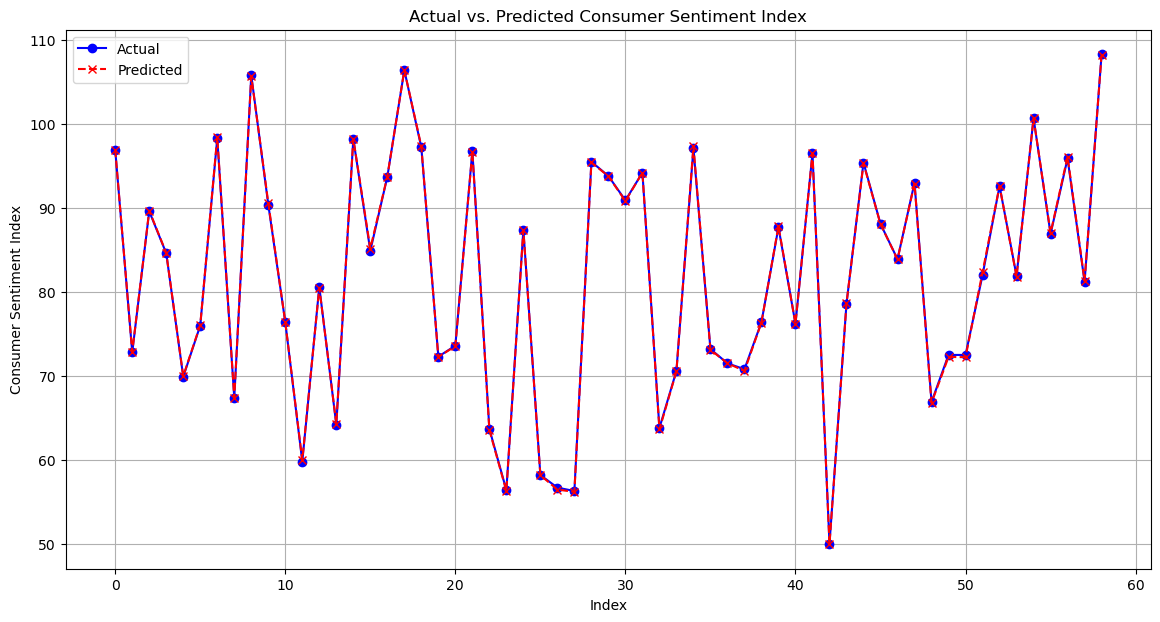

In [123]:
# Visualize the predictions
plt.figure(figsize=(14, 7))
plt.plot(comparison_df.index, comparison_df['Actual'], marker='o', linestyle='-', color='b', label='Actual')
plt.plot(comparison_df.index, comparison_df['Predicted'], marker='x', linestyle='--', color='r', label='Predicted')
plt.title('Actual vs. Predicted Consumer Sentiment Index')
plt.xlabel('Index')
plt.ylabel('Consumer Sentiment Index')
plt.legend()
plt.grid(True)
plt.show()

# Interpretation of Actual vs. Predicted Results

## Explanation

The table displays a comparison between the actual Consumer Sentiment Index values and the values predicted by our Linear Regression model. Let's break down what this means in the context of our project:

### Model Accuracy
- The predicted values are very close to the actual values, indicating that our model has a high degree of accuracy. This is evident from the minimal differences between the actual and predicted values.

### Real-World Implications
- **Business Insights:** Businesses can rely on this model to forecast consumer sentiment with high confidence. Accurate predictions of consumer sentiment can help businesses plan their marketing strategies, inventory levels, and sales forecasts. For example, if the model predicts a drop in consumer sentiment, businesses might prepare for lower sales and adjust their strategies accordingly.
- **Policy Implications:** Policymakers can use these predictions to gauge the public's economic outlook and make informed decisions about fiscal and monetary policies. For instance, if the model forecasts a decline in consumer sentiment, policymakers might consider implementing measures to boost economic confidence.

### Practical Applications
- **Investment Decisions:** Investors can use consumer sentiment predictions to make better investment decisions. High consumer sentiment usually correlates with economic growth, which can influence stock market performance and investment opportunities.
- **Economic Planning:** Government and financial institutions can use these predictions to plan for economic trends. For example, predicting a rise in consumer sentiment can indicate potential economic growth, leading to proactive measures to support this growth.

### Model Utility
- The close alignment between actual and predicted values demonstrates that our model can reliably predict future consumer sentiment trends. This utility extends to various stakeholders who depend on accurate economic forecasts to guide their decisions.

## Conclusion

The comparison of actual vs. predicted values highlights the effectiveness of our Linear Regression model in predicting the Consumer Sentiment Index. The high accuracy of predictions suggests that this model can be a valuable tool for businesses, policymakers, investors, and economic planners to anticipate and respond to changes in consumer sentiment, ultimately aiding in strategic decision-making and policy formulation.
